In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import numpy as np
import math

In [ ]:
G = nx.Graph()

In [ ]:
artists = {}
artistsList = []
artistsIdList = []

for artist in pd.read_csv('artists.csv').iterrows():
    data = list(artist)[1]
    artists[data['id']] = data['name']
    artistsList.append(data['name'])
    artistsIdList.append(data['id'])
    G.add_node(data['name'], role = 'artist', bipartite = 1)

print(artistsIdList) 
print(artistsList)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 22

In [ ]:
usersList = []

for userFriend in pd.read_csv('user_friends.csv').iterrows():
    data = list(userFriend)[1]

    if not G.has_node(data['userID']): 
        G.add_node(data['userID'], role='user', bipartite = 1)
        usersList.append(data['userID'])
    
    if not G.has_node(data['friendID']):
        G.add_node(data['friendID'], role='user', bipartite = 1)
        usersList.append(data['userID'])

    if not G.has_edge(data['userID'], data['friendID']):
      G.add_edge(data['userID'], data['friendID'])

In [ ]:
for userArtist in pd.read_csv('user_artist.csv').iterrows():
    data = list(userArtist)[1]

    if not G.has_node(data['userID']):
        G.add_node(data['userID'], role = 'user', bipartite = 1)
        usersList.append(data['userID'])
    
    if not G.has_node(data['artistID']): 
        G.add_node(data['artistID'], role='artist', bipartite = 1)

    if not G.has_edge(data['userID'], artists[data['artistID']]):
        G.add_edge(data['userID'], artists[data['artistID']])

In [ ]:
print("No of nodes:", len(G.nodes))
print("No of edges:", len(G.edges))

No of nodes: 35276
No of edges: 105551


In [ ]:
users = list(filter(lambda node: G.nodes[node]['role'] == 'user', list(G.nodes())))

print("No of users:", len(users))
print("No of artists:", len(artists))

No of users: 1892
No of artists: 17632


In [ ]:
def adamic_adar_index(G, u, v):
    # Get the set of neighbors of both nodes
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))

    # Get the intersection of the sets of neighbors
    common_neighbors = neighbors_u & neighbors_v

    # Calculate the sum of the inverse logarithm of the degree of each common neighbor
    score = 0
    for w in common_neighbors:
        score += 1 / math.log(G.degree(w))

    return score

In [ ]:
def aai_score(G, userID):
  if G.has_node(userID) : 
    non_adjList = []

    for artist in artistsList : 
      if not G.has_edge(userID, artist): 
        non_adjList.append(artist)

    results = {}
    for artist in non_adjList: 
      score = adamic_adar_index(G, artist, userID)
      results[score] = artist

    return results
  
  else : 
    print("User doesn't exist")


In [ ]:
def recommendation_adamicAdar(userID) : 

    index_values = aai_score(G, userID)
    scores = pd.Series(index_values.keys())
    quantile_val = scores.quantile(0.9)
    top_scores = []
    for score in scores : 
        if score > quantile_val : 
            top_scores.append(score)

    #print(top_scores)

    recommendation = []
    for score in top_scores: 
        recommendation.append(index_values[score])

    print(len(recommendation))
    print(top_scores)

    return recommendation


In [ ]:
print("Enter the User_Id to show recommendation : ")
userId = input()
result = recommendation_adamicAdar(1543)
print(result)



Enter the User_Id to show recommendation : 
3
72
[2.363094616560373, 6.103388593712034, 3.4645719681707017, 4.4609854204193535, 3.894131249492273, 2.4324055321728215, 5.953454384086017, 3.2867244508686557, 3.0087747339601587, 7.951455011359772, 3.5998437469841735, 2.900571958772079, 4.253891478003459, 5.27043756930994, 3.3466936046540963, 4.537190679726201, 2.669275799122999, 9.551675407657894, 2.815017214035496, 4.2070727067177565, 3.6157208480196705, 2.878323072636283, 3.840799414553029, 2.983943634237458, 2.770733360077028, 3.520152799612995, 2.5878696506277548, 3.041228531352865, 2.423001940458368, 4.337152018628445, 3.823718152387191, 2.40627659697561, 3.347571544116155, 2.3620205684021904, 2.804115781491687, 2.3466553054095756, 4.4607187068163805, 2.858764028278791, 3.1275107608953543, 3.808065492625448, 3.604809790169526, 4.574851855822905, 6.972589133091748, 6.795840705012981, 2.6533371260436702, 2.9564979338386506, 3.9884156803840316, 3.687919243310473, 3.9485461470391607, 2.3

In [ ]:
def jainam(G): 

    unconnected = {}

    for user in usersList:
        for artist in artistsList:
          if not G.has_edge(user, artist): 
            unconnected[user] = artist

    no_link = list(unconnected.items())
    index_values = {}

    for user in no_link : 
        score = adamic_adar_index(G, user, user[1])
        index_values[user] = score

    

        



In [ ]:
def new_user(userID):
  G.add_node(userID, role='user', bipartite=1)

  adjList = []
  print("Enter names of any 5 artists to continue")
  for i in range(0,5):
    adjList.append(input())
  
  adjUsers = []

  print("Enter names of any 5 friends to continue")
  for i in range(0,5):
    adjUsers.append(input())
  

  for artist in adjList : 
    G.add_edge(userID, artist)
  
  for user in adjUsers : 
    G.add_edge(userID, user)
  
  print("Enter the User_Id to show recommendation : ")
  userId = input()
  result = recommendation_adamicAdar(userID)
  print("recommendations for the given user are", end="\n")
  print(result)



In [ ]:
def recommendation_AAthreshold(G, userID) : 

    H = G.copy()
    userArtistEdges = []
    count=0
    for artist in artistsList: 
        if H.has_edge(userID, artist):
            count+=1
            H.remove_edge(userID, artist)
    

    

    aa_scores = {}
    
    for artist in artistsList : 
        aa_scores[(userID, artist)] = adamic_adar_index(H, userID, artist)
    
    max_score = max(list(aa_scores.values()))
    print(max_score)

    



In [ ]:
def plotHistogram(userID, scores): 
    plt.hist(scores, bins=20)
    plt.title("Distribution of Adamic-Adar scores for user {}".format(userID))
    plt.xlabel("Adamic-Adar score")
    plt.ylabel("Frequency")
    plt.show()

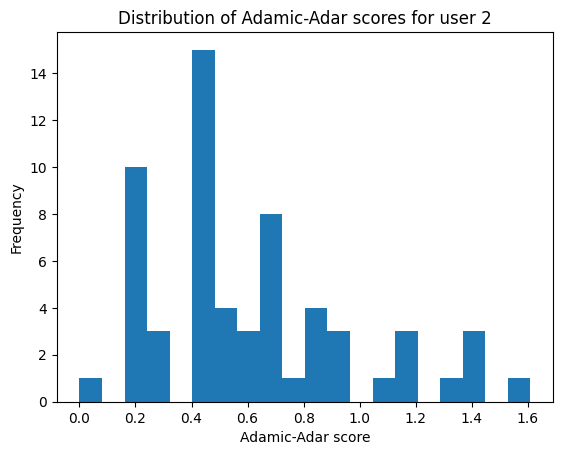

In [ ]:
H = G.copy()
plotHistogram(2, aai_score(H, 2).keys())